## 双极坐标系 bipolar coordinate

双极坐标系(η, ξ)是圆环坐标系(η, ξ, φ)的基础。

首先研究双极坐标系(η, ξ)和直角坐标系(x, y)之间的对应关系。

### 回顾一下双曲正弦和双曲余弦函数。


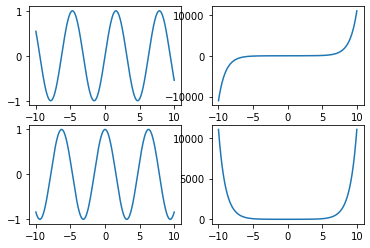

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-10,10,1000)
plt.subplot(221)
plt.plot(x,np.sin(x))
plt.subplot(222)
plt.plot(x,np.sinh(x))

plt.subplot(223)
plt.plot(x,np.cos(x))
plt.subplot(224)
plt.plot(x,np.cosh(x))

plt.show()

## 双极点坐标系(η, ξ)到直角坐标系(x, y)的转换

x = a*sh(η) / (ch(η) - cos(ξ))

y = a*sin(ξ) / (ch(η) - cos(ξ))

可见分母完全相同。

另外 a≈R shη≈1/r，即 a 相当于简单圆环坐标系中大半径 R，1/shη 相当于简单圆环坐标系中小半径 r。


MovieWriter imagemagick unavailable; using Pillow instead.


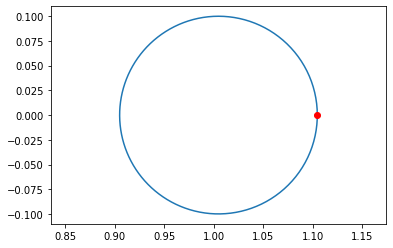

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 主变量
ksi = np.linspace(0,2*np.pi,360)
a = 1.0
eta = 3


def data(a,eta):
    x = a*np.sinh(eta)/(np.cosh(eta) - np.cos(ksi))
    y = a*np.sin(ksi)/(np.cosh(eta) - np.cos(ksi))
    return (x,y)

fig = plt.figure()
plt.plot(data(a,eta)[0], data(a,eta)[1])
point_ani, = plt.plot(data(a,eta)[0][0], data(a,eta)[1][0], "ro")

def update_points(index):
    '''
    更新数据点
    '''
    point_ani.set_data(data(a,eta)[0][index], data(a,eta)[1][index])
    return point_ani,

# 开始制作动画
ani = animation.FuncAnimation(fig, update_points, np.arange(0, 360), interval=100, blit=True)
 
# ani.save('bipolar_ksi.gif', writer='imagemagick', fps=10)
plt.axis("equal")
plt.show()

# 附录 rib 宽度计算


In [3]:
import numpy as np
import matplotlib.pyplot as plt

r = 0.113

f = lambda t:(
    r*(1/np.tan(30/180*np.pi))*np.sin(t) + 
    r*(1/np.tan(82/180*np.pi))*np.sin(2*t)/2 +
    r*(1/np.tan(86/180*np.pi))*np.sin(3*t)/3 +
    r*(1/np.tan(94/180*np.pi))*np.sin(4*t)/4
)

d = 0.0001
fd = lambda t:(f(t+d)-f(t))/d

lin0360 = np.linspace(0,np.pi*2,360)
f0360 = np.array([f(t) for t in lin0360])
fd0360 = np.array([fd(t) for t in lin0360])

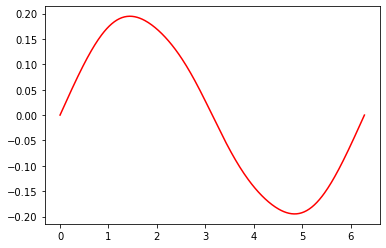

In [4]:
plt.plot(lin0360,f0360,'r-')

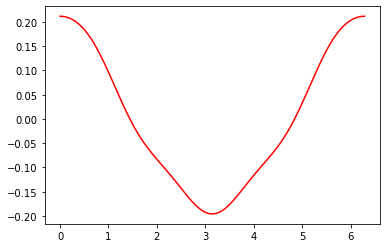

In [11]:
plt.plot(lin0360,fd0360,'r-')


In [9]:
z0 = 9.2 # mm
r = 0.113

rib0360 = z0 * np.sqrt(
    1 - 1/
    (1+(r**2)/(fd0360**2))
) - 3

1.3337449419736593


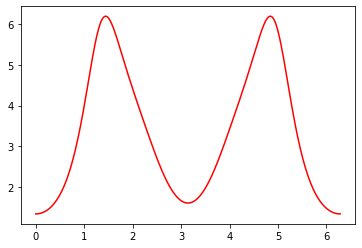

In [12]:
plt.plot(lin0360,rib0360,'r')
print(min(rib0360))

In [20]:
r = 0.113
R = 0.95
a = np.sqrt(R**2-r**2)
eta = 0.5 * np.log((R+a)/(R-a))

sheta = np.sinh(eta)
cheta = np.cosh(eta)

k = lambda ksi:cheta - np.cos(ksi)
phi0 = 67.5/180*np.pi / 128
phi = lambda ksi:(
    (1/sheta)*(1/np.tan(30/180*np.pi))*np.sin(ksi) + 
    (1/sheta)*(1/np.tan(82/180*np.pi))*np.sin(2*ksi)/2 +
    (1/sheta)*(1/np.tan(86/180*np.pi))*np.sin(3*ksi)/3 +
    (1/sheta)*(1/np.tan(94/180*np.pi))*np.sin(4*ksi)/4
) + phi0*ksi/(2*np.pi)

phid = lambda ksi:(phi(ksi+0.0001)-phi(ksi))/0.0001

dalta = lambda ksi: a * phi0 * (1/k(ksi)) * ((1/sheta)**2 + phid(ksi)**2)**(-0.5)

lin0360 = np.linspace(0,np.pi*2,360)
dalta0360 = np.array([dalta(t) for t in lin0360])

rib0360_1 = dalta0360*1000-3

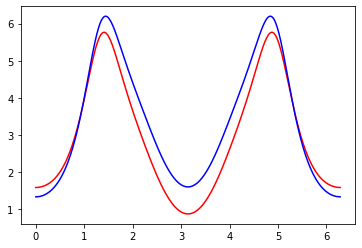

In [22]:
plt.plot(lin0360,rib0360_1,'r-')
plt.plot(lin0360,rib0360,'b-')